# 用 PyTorch framework 開發 MLP 找出 y=x**2+b 的回歸模型
# Using PyTorch framework to develop a MLP to find the regression model for input data y=x**2+b

Ref: 莫煩 Moven https://www.youtube.com/watch?v=psE63sPbIeI&list=PLXO45tsB95cJxT0mL0P3-G0rBcLSvVkKH&index=11

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Create test data

In [2]:
x = torch.linspace(-1, 1, 100).view(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

# 1. Copy x and y data to excel file and visualize their regression model in Tableau

# 2. Visualize scatter plot of x vs y using matplotlib

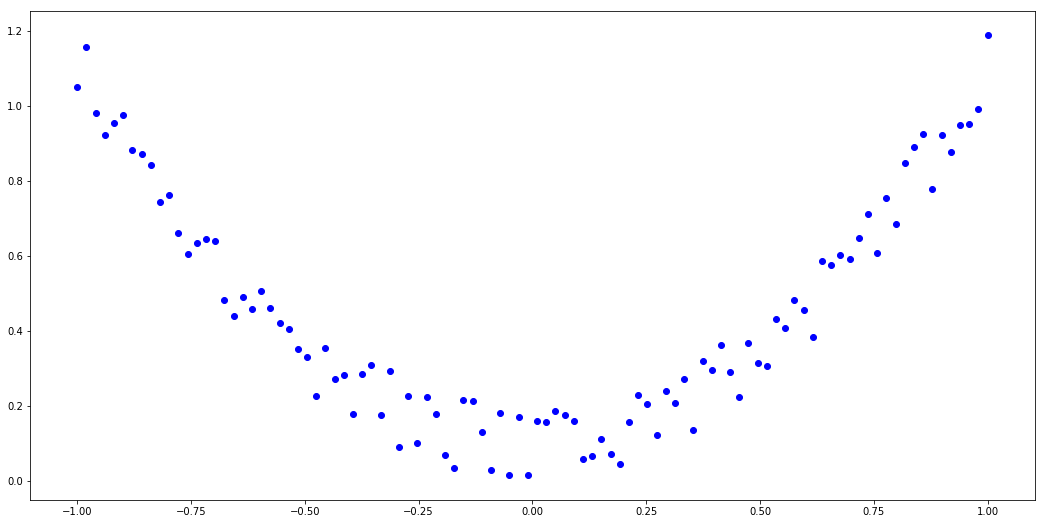

In [3]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.scatter(x.numpy(), y.numpy(), c='blue')
plt.show()

# Define a neural network

In [4]:
x, y = Variable(x), Variable(y)

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

# Instantiate the NN

In [6]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

In [7]:
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

# Define optimization and loss functions

In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

In [9]:
loss_func = torch.nn.MSELoss()

# Train the NN and visualize the training process

In [10]:
epoch = 0

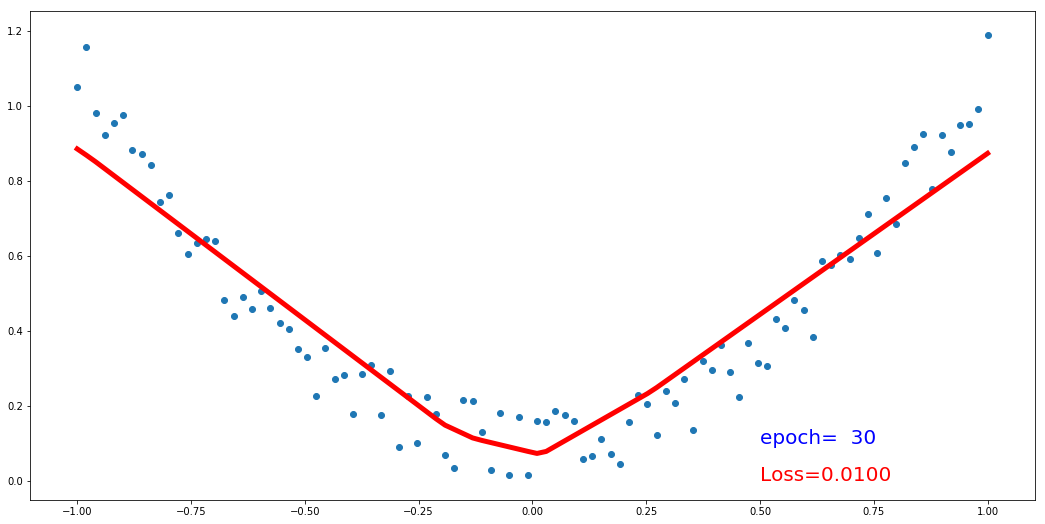

In [11]:
for t in range(30):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch = epoch + 1
    display.clear_output(wait=True)
    plt.figure(figsize=(18,9))
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0.1, 'epoch=%4d' % epoch, fontdict={'size':20, 'color': 'blue'})
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size':20, 'color': 'red'})
    plt.pause(0.1)

# try to run the above cell again !!